# Load in and Clean Data

In [1]:
###
# Part 1
###
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('data_sets/CreditCard.csv')

# Drop rows with any `null` values or empty strings
df = df.replace('', pd.NA).dropna()
df = df.reset_index(drop=True)

# Encode Values In Data Sets
df['Gender'] = df['Gender'].map({'M': 1, 'F': 0})
df['CarOwner'] = df['CarOwner'].map({'Y': 1, 'N': 0})
df['PropertyOwner'] = df['PropertyOwner'].map({'Y': 1, 'N': 0})

# Drop the Ind_ID
df = df.drop(columns=['Ind_ID'])

# Display the first few rows of the DataFrame
print(df.head())
print('Number of rows =',len(df))

###
# Part 2
###

# Get X and y values
y = df['CreditApprove']
X = df.drop(columns=['CreditApprove']) 


   CreditApprove  Gender  CarOwner  PropertyOwner  #Children  WorkPhone  \
0              1       1         1              1          0          0   
1              1       0         1              0          0          1   
2              1       0         1              0          0          1   
3              1       0         1              0          0          1   
4              1       0         1              0          0          1   

   Email_ID  
0         0  
1         0  
2         0  
3         0  
4         0  
Number of rows = 339


# (1) A figure of er(w) versus search round for local search, placed in Figure 2
# (2) Optimal w and er(w) returned by local search, placed in equations (3) and (4)

Step 0 = [-1, -1, -1, -1, -1, -1]
Step 1 = [-1, -1, 1, -1, -1, -1]
Step 2 = [1, -1, 1, -1, -1, -1]
Step 3 = [1, -1, 1, -1, 1, -1]
Step 4 = [1, -1, 1, -1, 1, 1]
Optimized w (hill climbing local search) = [1, -1, 1, -1, 1, 1]
Optimized er(w) = 1.2713864306784661


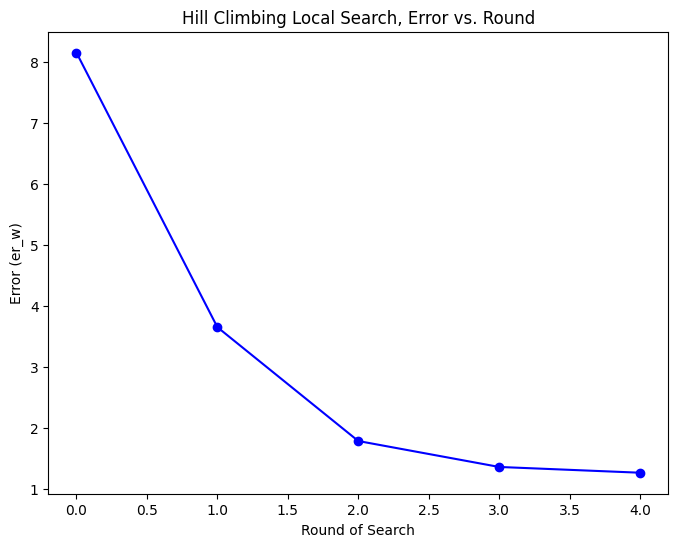

In [4]:
w = [-1, -1, -1, -1, -1, -1]

def find_er_w(w):
    fx = [0] * len(X)
    er_w_sum = 0
    for i in range(len(X)):
        for j in range(len(X.columns)):
            fx[i] += w[j] * X.iloc[i,j]
        er_w_sum += (fx[i] - y[i])**2
    er_w = er_w_sum  / len(X)
    return er_w

import copy
import matplotlib.pyplot as plt

def hill_climbing_local_search(w, threshold=1000):
    er_w_trasformations = []
    rounds = []
    min_found = False
    for i in range(threshold):
        print("Step",i,"=",w)
        current_er_w = find_er_w(w)

        er_w_trasformations.append(current_er_w)
        rounds.append(i)

        # Find adjacent solutions (so for each weight in w, flip the value)
        # Example: Have [1,1,1,1,1,1]
        # Result: Test [-1,1,1,1,1,1], [1,-1,1,1,1,1], etc.
        er_w_prime_best = 10 # 10 is greater than 1 * 6
        best_w_prime = []
        for j in range(len(X.columns)):
            w_prime = copy.deepcopy(w)
            w_prime[j] *= -1
            er_w_prime = find_er_w(w_prime)
            if er_w_prime < er_w_prime_best:
                er_w_prime_best = er_w_prime
                best_w_prime = w_prime

        if er_w_prime_best < current_er_w:
            w = best_w_prime
        else:
            print('Optimized w (hill climbing local search) =', w)
            print('Optimized er(w) =', current_er_w)
            min_found = True
            break
    if not min_found:
        print('Best so far w (hill climbing local search) =', w)
        print('Best so far er(w) =', current_er_w)

    plt.figure(figsize=(8,6))
    plt.plot(rounds, er_w_trasformations, marker='o', linestyle='-', color='b', label='Error')
    plt.xlabel('Round of Search')
    plt.ylabel('Error (er_w)')
    plt.title('Hill Climbing Local Search, Error vs. Round')
    plt.show()
    return w

w = hill_climbing_local_search([-1,-1,-1,-1,-1,-1])

# (3) A figure of er(w) versus generation for genetic algorithm, place in Figure 3
# (4) Optimal w and er(w) returned by genetic algorithm, placed in equations (8) and (9)